# LOADING THE DATASET

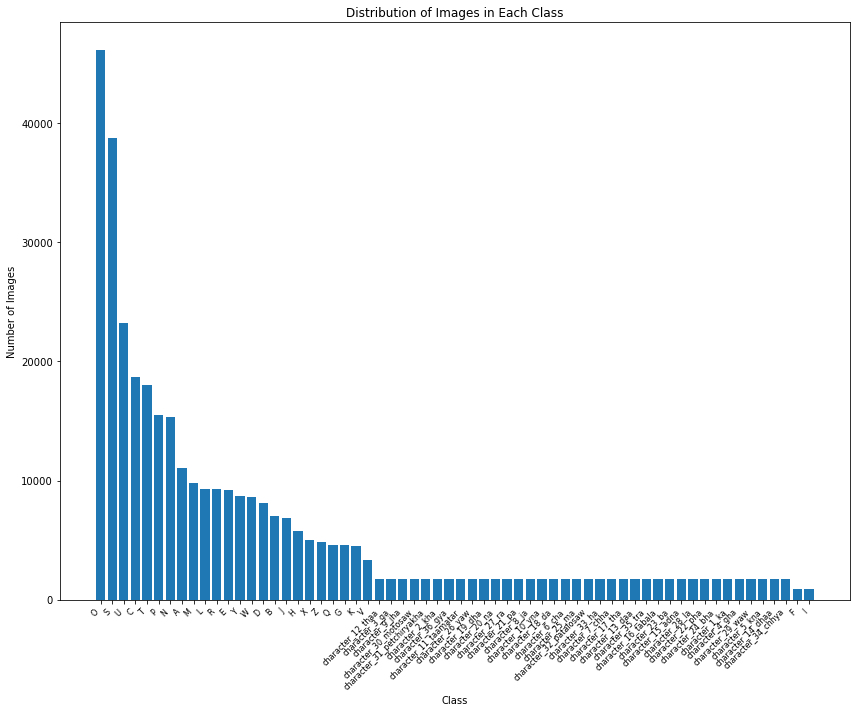

In [10]:
import os
import matplotlib.pyplot as plt

dataset_path = 'english_hindi_combined_dataset/'  # Replace with the actual path to your combined dataset

# Get the list of classes
classes = os.listdir(os.path.join(dataset_path, 'train'))

# Initialize a dictionary to store the count of images for each class
class_counts = {}

# Count the number of images in each class
for class_name in classes:
    class_path = os.path.join(dataset_path, 'train', class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

# Plot the count of images for each class with rotated labels
plt.figure(figsize=(12, 10))
plt.bar(sorted_class_counts.keys(), sorted_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Each Class')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout() 
plt.show()


# Model Training

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the path to your combined dataset
dataset_path = 'english_hindi_combined_dataset/'

# Augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
)

batch_size = 32

train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'test/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the model
model.save('alphabet_recognition_model.h5')

# Get the class indices mapping
class_indices_mapping = train_generator.class_indices

# Save the mapping to a file (optional)
np.save('class_indices_mapping.npy', class_indices_mapping)


2024-01-21 19:34:26.036310: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 19:34:27.404061: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 359160 images belonging to 62 classes.
Found 85291 images belonging to 62 classes.


2024-01-21 19:34:40.929713: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-21 19:34:41.145509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-21 19:34:41.145759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/5


2024-01-21 19:34:43.678858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-01-21 19:34:47.338685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-01-21 19:34:48.414118: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x705108014800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-21 19:34:48.414149: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-01-21 19:34:48.459551: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-21 19:34:48.

11223/11224 [============================>.] - ETA: 0s - loss: 0.6466 - accuracy: 0.8183

2024-01-21 19:37:37.595528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11224/11224 [==============================] - 211s 18ms/step - loss: 0.6466 - accuracy: 0.8184 - val_loss: 0.1209 - val_accuracy: 0.9648
Epoch 2/5
11224/11224 [==============================] - 198s 18ms/step - loss: 0.2991 - accuracy: 0.9138 - val_loss: 0.1148 - val_accuracy: 0.9682
Epoch 3/5
11224/11224 [==============================] - 200s 18ms/step - loss: 0.2386 - accuracy: 0.9325 - val_loss: 0.0789 - val_accuracy: 0.9791
Epoch 4/5
11224/11224 [==============================] - 197s 18ms/step - loss: 0.2071 - accuracy: 0.9415 - val_loss: 0.0706 - val_accuracy: 0.9812
Epoch 5/5
  16/2666 [..............................] - ETA: 29s - loss: 0.0333 - accuracy: 0.9883   

2024-01-21 19:51:11.989225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2666/2666 [==============================] - 33s 12ms/step - loss: 0.0617 - accuracy: 0.9839
Test accuracy: 98.39%


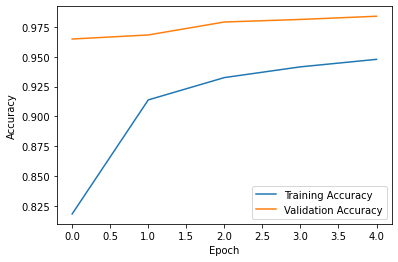

In [2]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
import random


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Building ResNET model for alphabet recognition

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the path to your combined dataset
dataset_path = 'english_hindi_combined_dataset/'

# Augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
)

batch_size = 32

train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'test/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

# Build the ResNet model
def build_resnet_model(input_shape, num_classes):
    # Input layer
    input_tensor = layers.Input(shape=input_shape)

    # Initial convolution layer
    x = layers.Conv2D(64, (7, 7), padding='same', activation='relu')(input_tensor)
    x = layers.MaxPooling2D((2, 2))(x)

    # Residual blocks
    for _ in range(3):
        residual = x

        x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
        x = layers.Conv2D(64, (3, 3), padding='same')(x)
        x = layers.add([x, residual])
        x = layers.Activation('relu')(x)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layer
    x = layers.Dense(256, activation='relu')(x)

    # Output layer
    output_tensor = layers.Dense(num_classes, activation='softmax')(x)

    # Create and compile the model
    model = models.Model(inputs=input_tensor, outputs=output_tensor)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Assuming input_shape and num_classes are defined appropriately for your dataset
input_shape = (28, 28, 1)  # Adjust based on your image dimensions
num_classes = len(train_generator.class_indices)

resnet_model = build_resnet_model(input_shape, num_classes)

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = resnet_model.fit(
    train_generator,
    epochs=5,  # Adjust the number of epochs based on your dataset and experimentation
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_acc = resnet_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the model
resnet_model.save('resnet_alphabet_recognition_model.h5')


Found 359160 images belonging to 62 classes.
Found 85291 images belonging to 62 classes.
Epoch 1/5


2024-01-22 11:01:21.627374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11224/11224 [==============================] - ETA: 0s - loss: 0.3294 - accuracy: 0.9050

2024-01-22 11:04:18.602312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11224/11224 [==============================] - 217s 19ms/step - loss: 0.3294 - accuracy: 0.9050 - val_loss: 0.0873 - val_accuracy: 0.9752
Epoch 2/5
11224/11224 [==============================] - 208s 18ms/step - loss: 0.0839 - accuracy: 0.9755 - val_loss: 0.0734 - val_accuracy: 0.9793
Epoch 3/5
11224/11224 [==============================] - 281s 25ms/step - loss: 0.0631 - accuracy: 0.9818 - val_loss: 0.0559 - val_accuracy: 0.9841
Epoch 4/5
11224/11224 [==============================] - 299s 27ms/step - loss: 0.0527 - accuracy: 0.9847 - val_loss: 0.0528 - val_accuracy: 0.9857
Epoch 5/5
   7/2666 [..............................] - ETA: 46s - loss: 0.0082 - accuracy: 0.9955    

2024-01-22 11:21:54.760373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2666/2666 [==============================] - 40s 15ms/step - loss: 0.0434 - accuracy: 0.9880
Test accuracy: 98.80%


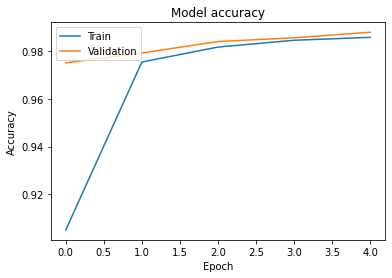

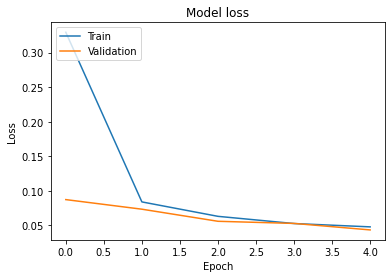

In [4]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [19]:
# Improved CNN model
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the path to your combined dataset
dataset_path = 'english_hindi_combined_dataset/'

# Augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,  # Increase rotation for better recognition of alphabet shapes
    shear_range=0.2,  # Apply shear to simulate variations in handwriting
)

batch_size = 32

train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'test/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.125))
model.add(layers.BatchNormalization())
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the model
model.save('improved_alphabet_recognition_model_2.h5')





Found 359160 images belonging to 62 classes.
Found 85291 images belonging to 62 classes.
Epoch 1/3


2024-01-24 13:27:27.208074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11224/11224 [==============================] - ETA: 0s - loss: 0.5293 - accuracy: 0.8882

2024-01-24 13:33:37.611211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11224/11224 [==============================] - 462s 41ms/step - loss: 0.5293 - accuracy: 0.8882 - val_loss: 0.1010 - val_accuracy: 0.9719
Epoch 2/3
11224/11224 [==============================] - 479s 43ms/step - loss: 0.1757 - accuracy: 0.9559 - val_loss: 0.0810 - val_accuracy: 0.9769
Epoch 3/3
   3/2666 [..............................] - ETA: 1:46 - loss: 0.0706 - accuracy: 0.9792

2024-01-24 13:50:24.728587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2666/2666 [==============================] - 71s 27ms/step - loss: 0.0736 - accuracy: 0.9788
Test accuracy: 97.88%


In [ ]:
# model with balanced classes 
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# Set the path to your combined dataset
dataset_path = 'english_hindi_combined_dataset/'

# Augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,  # Increase rotation for better recognition of alphabet shapes
    shear_range=0.2,  # Apply shear to simulate variations in handwriting
)

batch_size = 32

train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'test/'),
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.125))
model.add(layers.BatchNormalization())
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# need to balance class difference as english alphabets have more data compared to hindi alphabets
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)

# Create a dictionary mapping class indices to their respective weights
class_weights_dict = dict(enumerate(class_weights))


# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator,
    class_weight = class_weights_dict
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the model
model.save('alphabet_recognition_balanced_classes.h5')





# Making Predictions on Multiple Alphabets

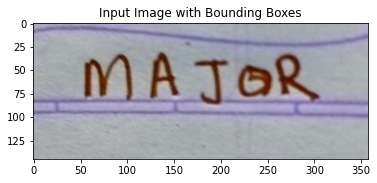

1/1 [==============================] - 0s 29ms/step
Alphabets detected: M A J O R


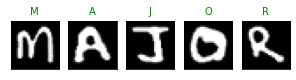

In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
model_path = 'models/improved_alphabet_recognition_model.h5'  # Replace with the actual path to your saved model
model = load_model(model_path)

def manual_mapping(class_index):
    manual_mapping_dict = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
        20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'character_10_yna',
        27: 'character_11_taamatar', 28: 'character_12_thaa', 29: 'character_13_daa',
        30: 'character_14_dhaa', 31: 'character_15_adna', 32: 'character_16_tabala',
        33: 'character_17_tha', 34: 'character_18_da', 35: 'character_19_dha',
        36: 'character_1_ka', 37: 'character_20_na', 38: 'character_21_pa',
        39: 'character_22_pha', 40: 'character_23_ba', 41: 'character_24_bha',
        42: 'character_25_ma', 43: 'character_26_yaw', 44: 'character_27_ra',
        45: 'character_28_la', 46: 'character_29_waw', 47: 'character_2_kha',
        48: 'character_30_motosaw', 49: 'character_31_petchiryakha',
        50: 'character_32_patalosaw', 51: 'character_33_ha', 52: 'character_34_chhya',
        53: 'character_35_tra', 54: 'character_36_gya', 55: 'character_3_ga',
        56: 'character_4_gha', 57: 'character_5_kna', 58: 'character_6_cha',
        59: 'character_7_chha', 60: 'character_8_ja', 61: 'character_9_jha'
    }
    return manual_mapping_dict.get(class_index, 'Unknown')

def predict_with_threshold(model, digit, threshold=0.55):
    # Reshape and normalize for prediction
    prediction = model.predict(digit.reshape(1, 28, 28, 1) / 255.)

    # Get the predicted class index and confidence
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # Check if confidence is above the threshold
    if confidence >= threshold:
        return manual_mapping(predicted_class_index)
    else:
        return 'Unknown'

def preprocess_image(image):
    # Apply median blur to reduce noise
    blur_image = cv2.medianBlur(image, 7)

    # Convert to grayscale
    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY) if len(blur_image.shape) == 3 else blur_image

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(grey, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 25)

    return thresh

def extract_preprocessed_digits(contours, image):
    preprocessed_digits = []

    for c in contours:
        # Additional preprocessing steps
        area = cv2.contourArea(c)
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = float(w) / h

        # Contour area thresholding
        if area < 90:
            continue

        # Aspect ratio filtering
        if aspect_ratio < 0.2 or aspect_ratio > 2:
            continue

        # Bounding box size filtering
        if w < 10 or h < 10:
            continue

        # Extract the digit
        digit = image[y:y+h, x:x+w]

        # Resize the digit to match the input size used during training
        resized_digit = cv2.resize(digit, (28, 28))

        # Pad the digit
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        preprocessed_digits.append(padded_digit)

    return preprocessed_digits

# Load and preprocess the input image
image_path = 'test_images/12_major.jpeg'  # Replace with the actual path to your input image
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocess the image
preprocessed_image = preprocess_image(original_image)

# Find contours
contours, hierarchy = cv2.findContours(preprocessed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on x-coordinate
boundingBoxes = [cv2.boundingRect(c) for c in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0], reverse=False))

# Extract preprocessed digits
preprocessed_digits = extract_preprocessed_digits(contours, preprocessed_image)

# Display the original image with bounding boxes
plt.imshow(original_image, cmap="gray")
plt.title("Input Image with Bounding Boxes")
plt.show()

# Display the individual digits
fig = plt.figure(figsize=(len(preprocessed_digits), 12))
alphabets_unseen = []
for i, digit in enumerate(preprocessed_digits):
    # Resize digit to (28, 28)
    digit_resized = cv2.resize(digit, (28, 28))

    # Perform prediction with confidence thresholding
    pred = predict_with_threshold(model, digit_resized)
    alphabets_unseen.append(pred)
    fig.add_subplot(1, len(preprocessed_digits), i+1)

    # Display the digit
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digit_resized, cmap="gray")
    plt.title(pred, color='green', fontsize=10)

print("Alphabets detected:", *alphabets_unseen)
